# Quality control of cells

In [2]:
library(Seurat)
library(tidyverse)
library(ggplot2)
setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

#### load scRNA-seq data

In [3]:
load("data_out/0.2.scRNAlist_remove_doublets.rdata")
ls()

[1] "scRNAlist_sub"

In [4]:
sample_name<-c("S1", "S2", "S3","S4","S5","S6","S7")
SCLC_all <- merge(scRNAlist_sub[[1]], y = c(scRNAlist_sub[[2]], scRNAlist_sub[[3]], scRNAlist_sub[[4]], scRNAlist_sub[[5]], scRNAlist_sub[[6]], scRNAlist_sub[[7]]), 
                  add.cell.ids = sample_name, project = "SCLC")

In [5]:
head(SCLC_all@meta.data, 5)
table(SCLC_all$DF.res)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_28,DF.classifications_0.25_0.005_28,DF.res,pANN_0.25_0.01_120,⋯,pANN_0.25_0.24_276,DF.classifications_0.25_0.24_276,pANN_0.25_0.06_58,DF.classifications_0.25_0.06_58,pANN_0.25_0.24_33,DF.classifications_0.25_0.24_33,pANN_0.25_0.03_325,DF.classifications_0.25_0.03_325,pANN_0.25_0.02_10,DF.classifications_0.25_0.02_10
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
S1_AAACGCTCATTAGGCT-1,SeuratProject,38063.560,6485,9.2669949,3,3,0.14285714,Singlet,Singlet,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1_AAACGCTGTACGACAG-1,SeuratProject,22451.609,4464,11.2228054,7,7,0.00000000,Singlet,Singlet,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1_AAACGCTGTTGTGCCG-1,SeuratProject,37911.320,5923,13.1976097,0,0,0.07142857,Singlet,Singlet,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1_AAAGAACGTAATTGGA-1,SeuratProject,3396.745,1552,5.2367781,4,4,0.07142857,Singlet,Singlet,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1_AAAGAACTCAACACCA-1,SeuratProject,21211.397,4539,0.8056408,1,1,0.14285714,Singlet,Singlet,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA



Singlet 
  24755 

In [6]:
# clean metadata 
remove.col <- c(grep("^pANN", colnames(SCLC_all@meta.data)), grep("^DF.", colnames(SCLC_all@meta.data)))
SCLC_all@meta.data <- SCLC_all@meta.data[,-remove.col]

SCLC_all$RNA_snn_res.0.5 <- NULL
SCLC_all$seurat_clusters <- NULL

# add sample information 
SCLC_all$sample = sapply(X = strsplit(colnames(SCLC_all), split = "_"), FUN = "[", 1)
SCLC_all$orig.ident = SCLC_all$sample
head(SCLC_all@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample
,<chr>,<dbl>,<int>,<dbl>,<chr>
S1_AAACGCTCATTAGGCT-1,S1,38063.560,6485,9.2669949,S1
S1_AAACGCTGTACGACAG-1,S1,22451.609,4464,11.2228054,S1
S1_AAACGCTGTTGTGCCG-1,S1,37911.320,5923,13.1976097,S1
S1_AAAGAACGTAATTGGA-1,S1,3396.745,1552,5.2367781,S1
S1_AAAGAACTCAACACCA-1,S1,21211.397,4539,0.8056408,S1


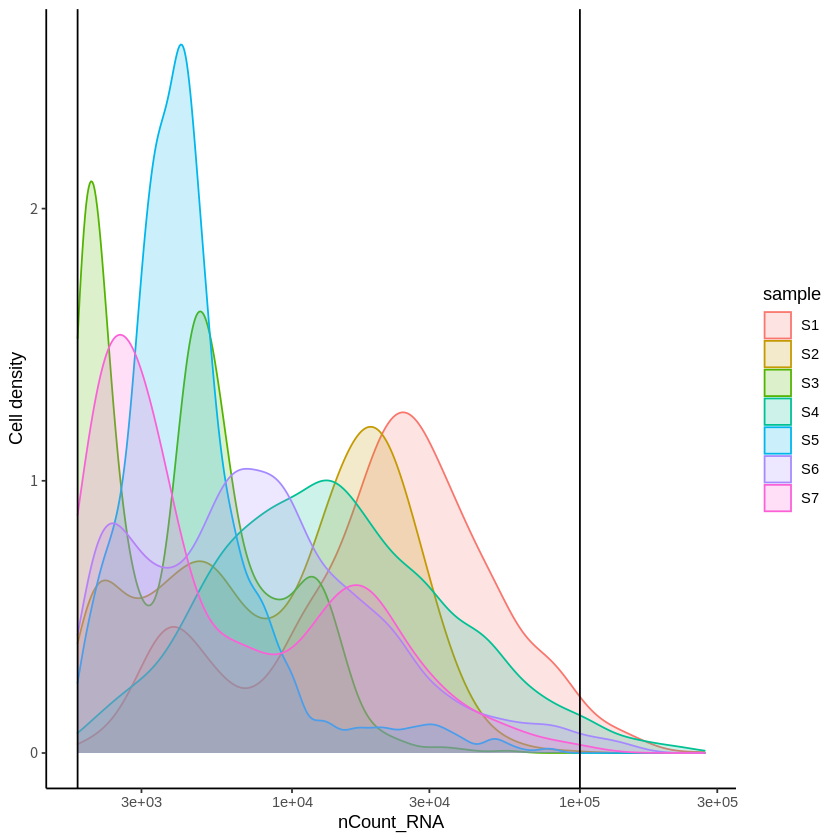

In [38]:
# Visualize the number UMIs/transcripts per cell
SCLC_all@meta.data %>% 
  	ggplot(aes(color=sample, x=nCount_RNA, fill= sample)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	ylab("Cell density") +
  	geom_vline(xintercept = c(1800,100000))

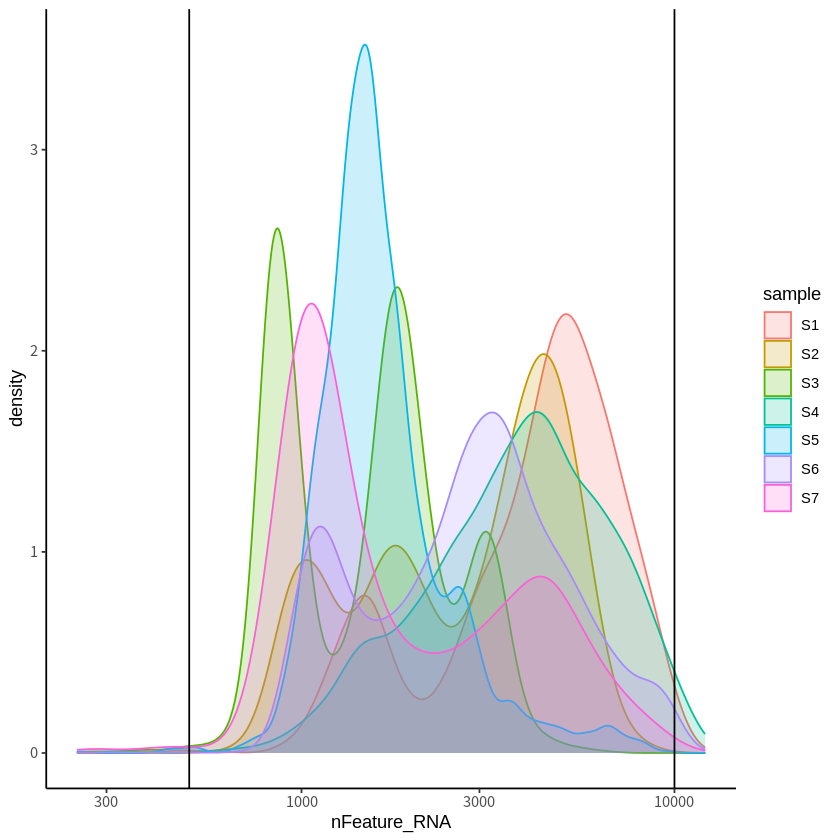

In [39]:
# Visualize the distribution of genes detected per cell via histogram
SCLC_all@meta.data %>% 
  	ggplot(aes(color=sample, x=nFeature_RNA, fill= sample)) + 
  	geom_density(alpha = 0.2) + 
  	theme_classic() +
  	scale_x_log10() + 
  	geom_vline(xintercept = c(500,10000))

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 79 rows containing non-finite values (stat_density).”


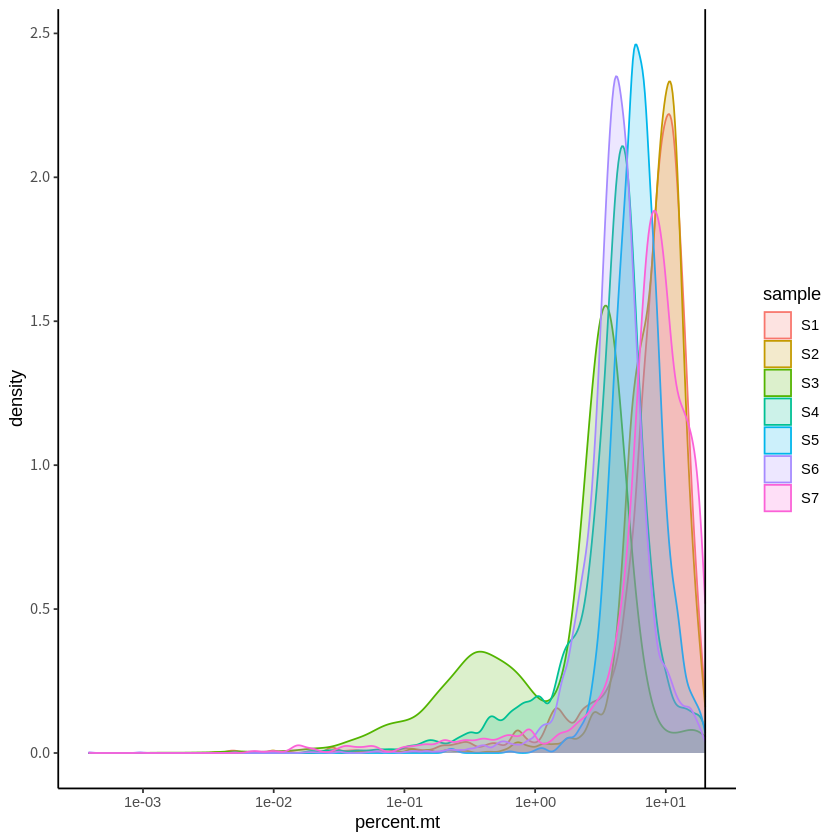

In [40]:
# Visualize the distribution of mitochondrial gene expression detected per cell
SCLC_all@meta.data %>% 
  	ggplot(aes(color=sample, x=percent.mt, fill=sample)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	geom_vline(xintercept = 20)

In [41]:
# remove red blood cells
HB.genes_total <- c("HBA1","HBA2","HBB","HBD","HBE1","HBG1","HBG2","HBM","HBQ1","HBZ") # human common HB genes
HB_m <- match(HB.genes_total,rownames(SCLC_all@assays$RNA))
HB.genes <- rownames(SCLC_all@assays$RNA)[HB_m]
HB.genes <- HB.genes[!is.na(HB.genes)]
SCLC_all[["percent.HB"]]<-PercentageFeatureSet(SCLC_all,features=HB.genes)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 23231 rows containing non-finite values (stat_density).”


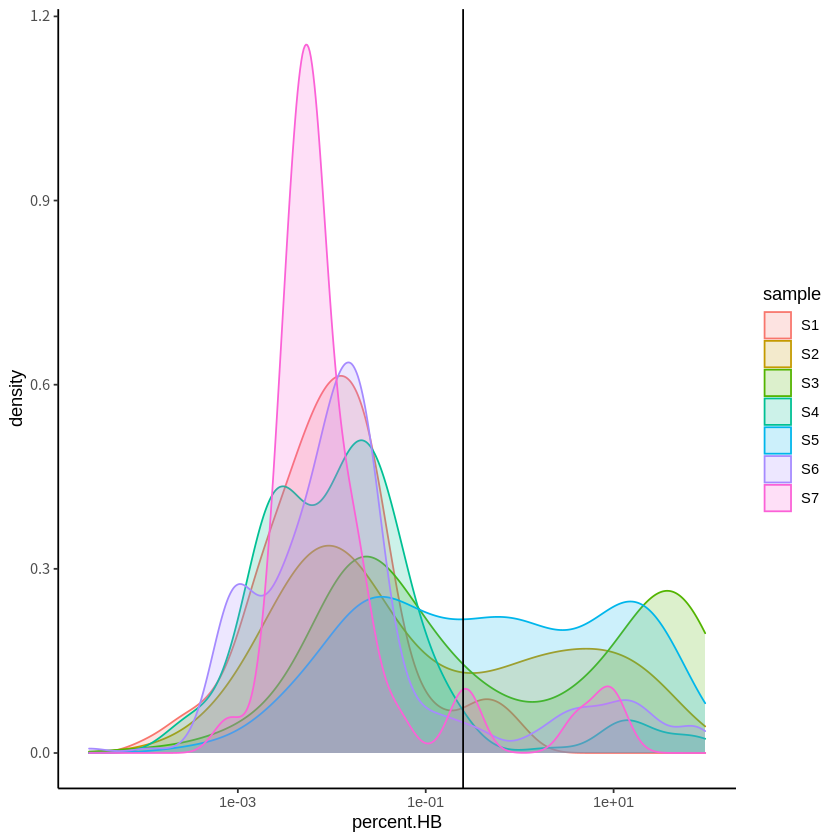

In [52]:
# Visualize the distribution of HB gene expression detected per cell
SCLC_all@meta.data %>% 
  	ggplot(aes(color=sample, x=percent.HB, fill=sample)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	geom_vline(xintercept = 0.25)

In [44]:
table(SCLC_all$percent.HB > 0.5)


FALSE  TRUE 
24334   421 

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


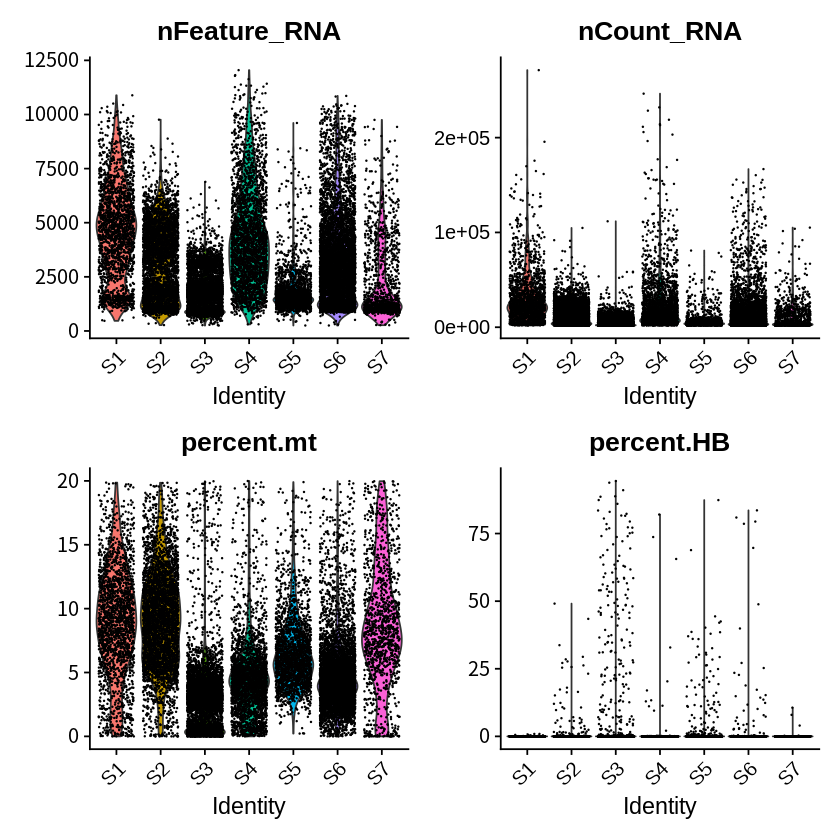

In [45]:
VlnPlot(SCLC_all, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "percent.HB"),group.by = "sample", ncol = 2)->plot1
CombinePlots(plots = list( plot1))

In [54]:

SCLC.filter<- subset(SCLC_all, subset = nFeature_RNA > 500 & nFeature_RNA < 10000 
                     & nCount_RNA > 1800 & nCount_RNA < 100000 
                     & percent.mt < 20 & percent.HB < 0.25 )
SCLC.filter
table(SCLC.filter$sample)

An object of class Seurat 
33538 features across 24081 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)


  S1   S2   S3   S4   S5   S6   S7 
1949 3992 5762 2738 2075 6361 1204 

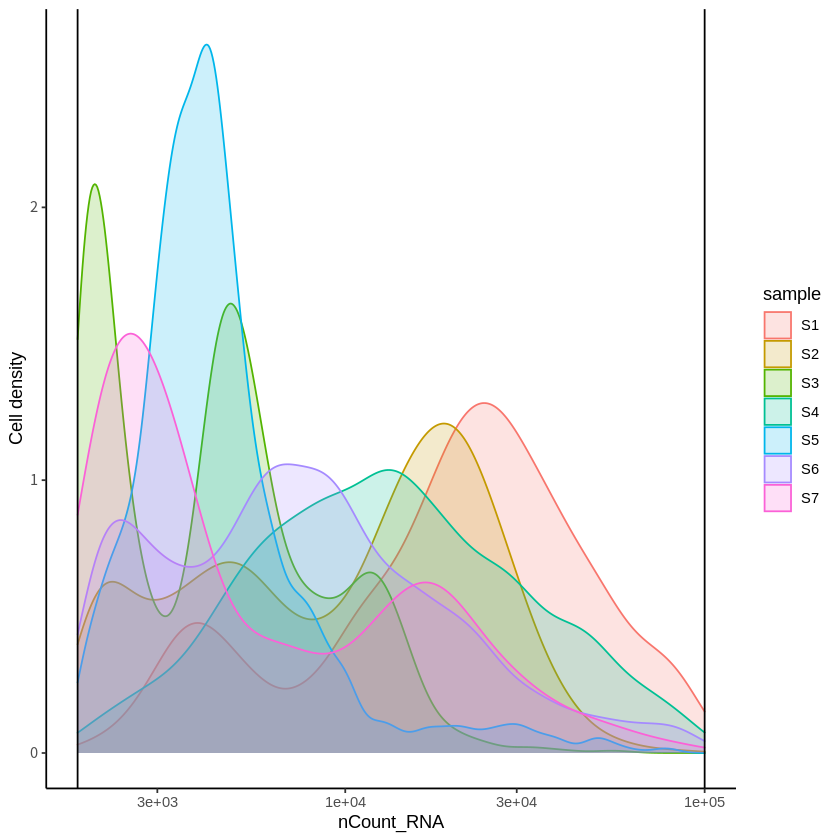

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 47 rows containing non-finite values (stat_density).”


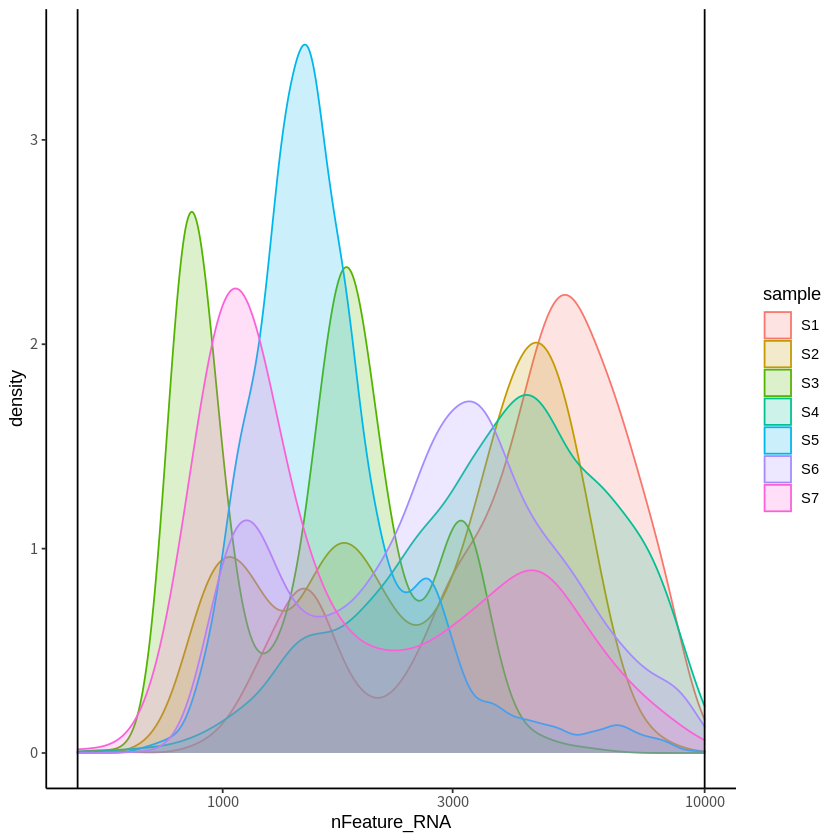

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 23050 rows containing non-finite values (stat_density).”


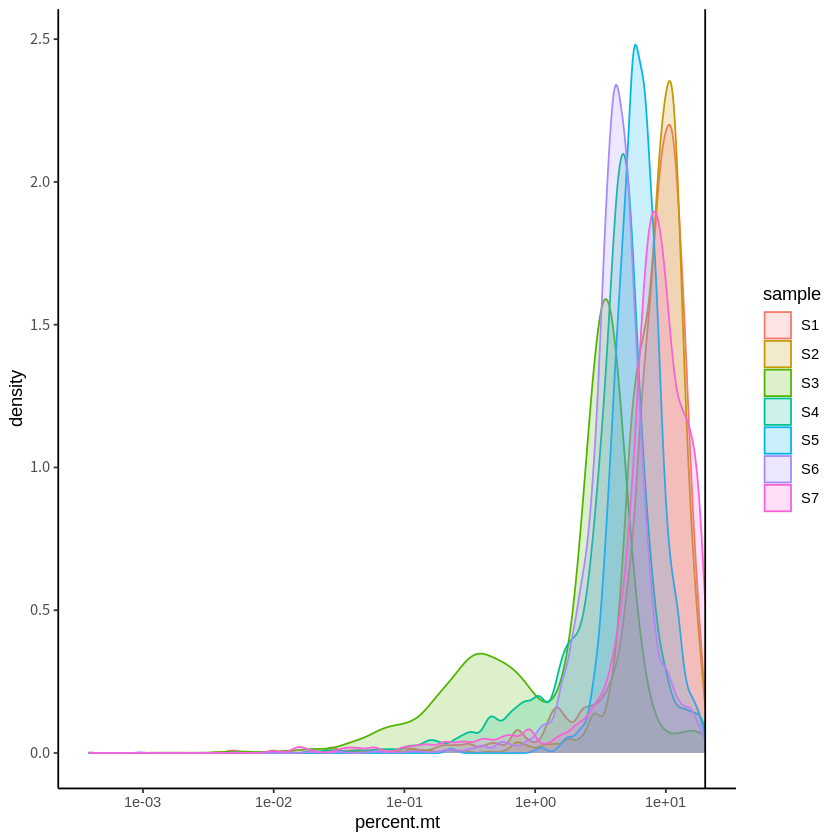

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


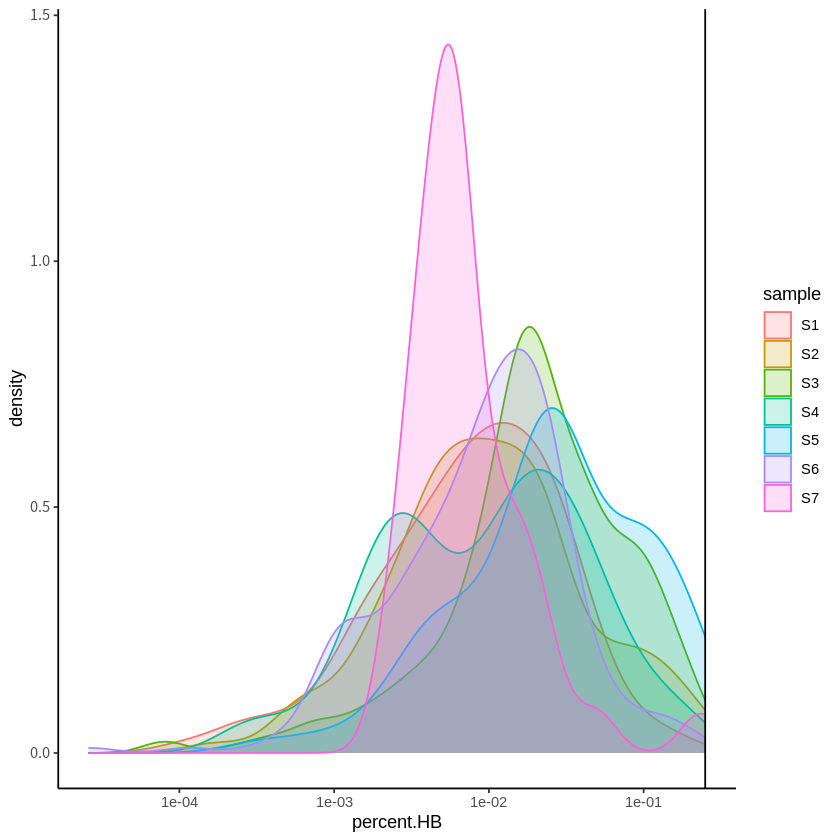

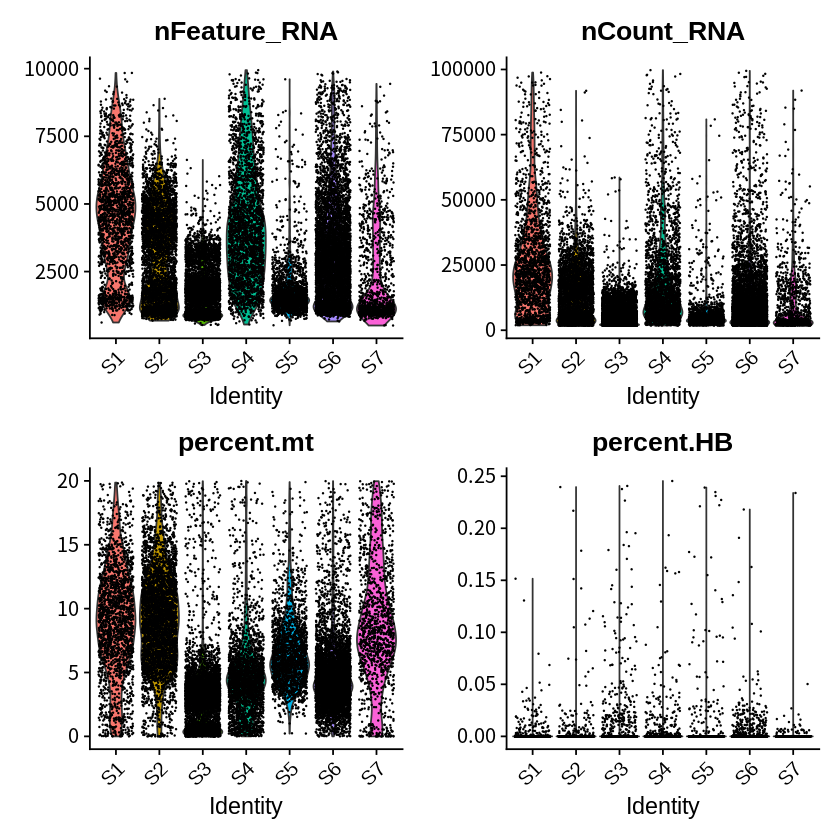

In [55]:
# recheck
SCLC.filter@meta.data %>% 
  ggplot(aes(color=sample, x=nCount_RNA, fill= sample)) + 
  geom_density(alpha = 0.2) + 
  scale_x_log10() + 
  theme_classic() +
  ylab("Cell density") +
  geom_vline(xintercept = c(1800,100000))
SCLC.filter@meta.data %>% 
  ggplot(aes(color=sample, x=nFeature_RNA, fill= sample)) + 
  geom_density(alpha = 0.2) + 
  theme_classic() +
  scale_x_log10() + 
  geom_vline(xintercept = c(500,10000))
SCLC.filter@meta.data %>% 
  ggplot(aes(color=sample, x=percent.mt, fill=sample)) + 
  geom_density(alpha = 0.2) + 
  scale_x_log10() + 
  theme_classic() +
  geom_vline(xintercept = 20)
SCLC.filter@meta.data %>% 
  ggplot(aes(color=sample, x=percent.HB, fill=sample)) + 
  geom_density(alpha = 0.2) + 
  scale_x_log10() + 
  theme_classic() +
  geom_vline(xintercept = 0.25)
VlnPlot(SCLC.filter, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "percent.HB"),group.by = "sample", ncol = 2)->plot1
CombinePlots(plots = list( plot1))

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 5228 rows containing missing values (geom_point).”
Centering and scaling data matrix



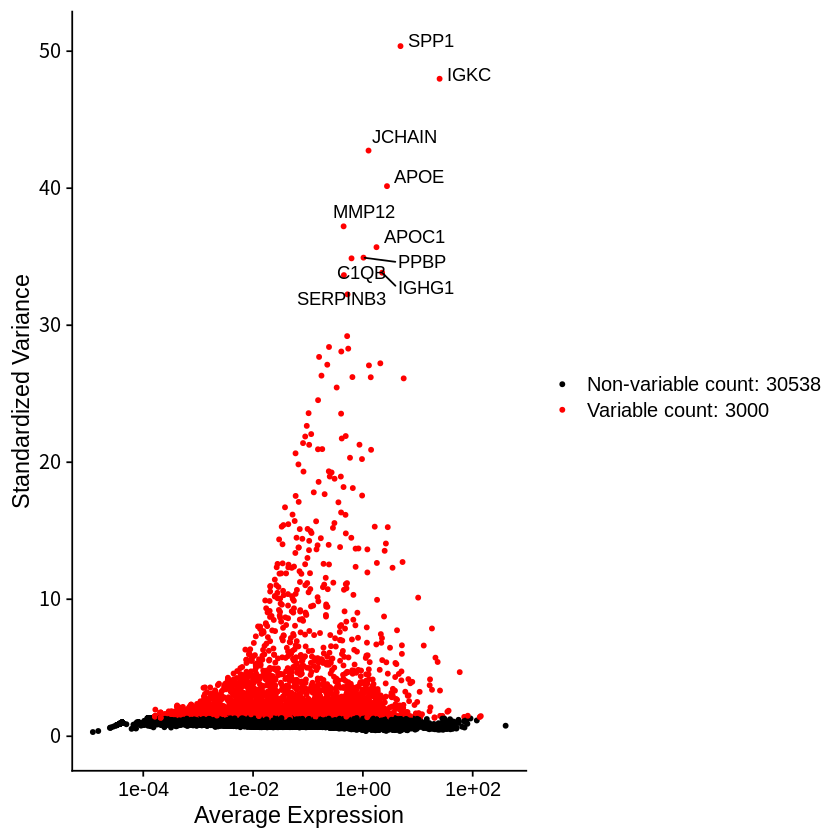

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24081
Number of edges: 1000552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9315
Number of communities: 29
Elapsed time: 5 seconds


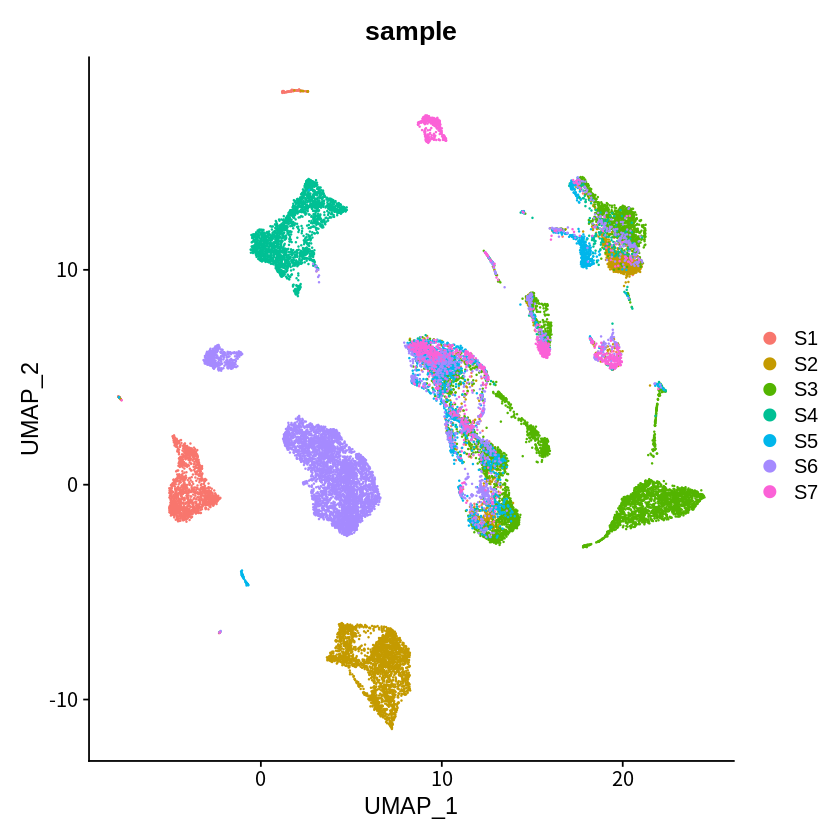

In [57]:
# frist cluster
SCLC.filter <- NormalizeData(SCLC.filter, normalization.method = "LogNormalize", scale.factor = 10000)

SCLC.filter <- FindVariableFeatures(SCLC.filter, selection.method = "vst", nfeatures = 3000)
top10 <- head(VariableFeatures(SCLC.filter), 10)

plot1 <- VariableFeaturePlot(SCLC.filter)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot2))

SCLC.filter <- ScaleData(SCLC.filter, features = VariableFeatures(object = SCLC.filter))

SCLC.filter <- RunPCA(SCLC.filter, npcs = 60, verbose = FALSE, features = VariableFeatures(object = SCLC.filter))
SCLC.filter <- RunUMAP(SCLC.filter, umap.method = 'umap-learn',reduction = "pca", dims = 1:60, metric="correlation")
DimPlot(SCLC.filter, reduction = "umap",group.by="sample")


SCLC.filter <- FindNeighbors(SCLC.filter, dims = 1:60)
SCLC.filter <- FindClusters(SCLC.filter, resolution = 0.8)


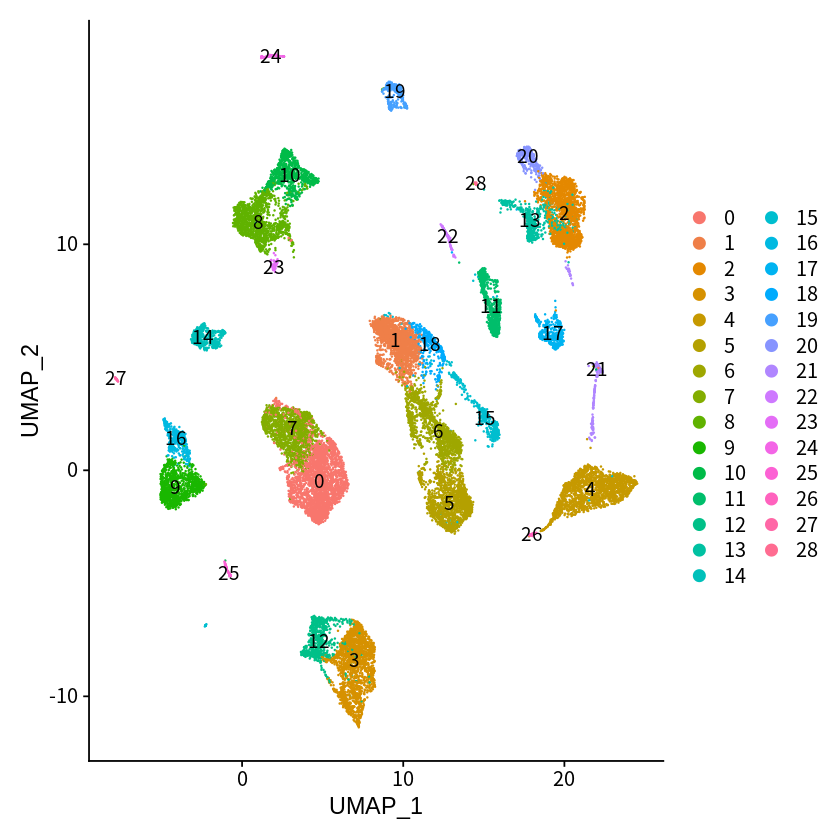

In [58]:
DimPlot(SCLC.filter, reduction = "umap", label=T)
### because too many clusters due to batch effect we start to use harmony 

In [59]:
# save work 
# save(SCLC.filter,  file = "data_out/1.SCLC.filter.rdata")

In [60]:
SCLC_all
SCLC.filter

An object of class Seurat 
33538 features across 24755 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

An object of class Seurat 
33538 features across 24081 samples within 1 assay 
Active assay: RNA (33538 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

In [61]:
## summary 
SCLC.filter
table(SCLC.filter$sample)
summary(SCLC.filter$nCount_RNA);summary(SCLC.filter$nFeature_RNA);

An object of class Seurat 
33538 features across 24081 samples within 1 assay 
Active assay: RNA (33538 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap


  S1   S2   S3   S4   S5   S6   S7 
1949 3992 5762 2738 2075 6361 1204 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1800    3487    6453   11894   15045   99741 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    507    1400    2352    2910    4018    9945 

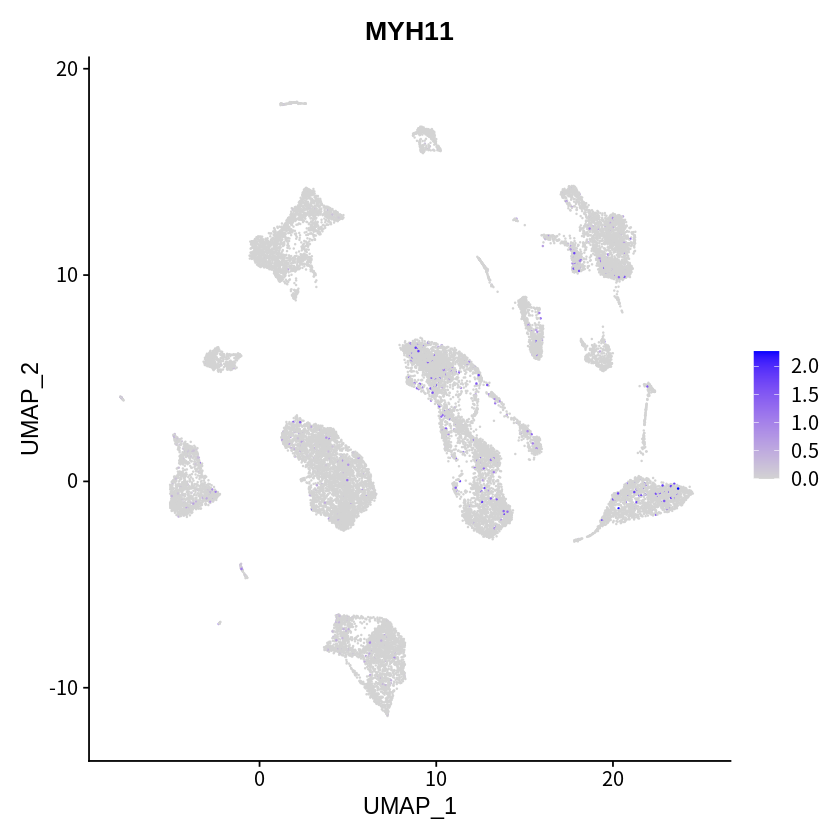

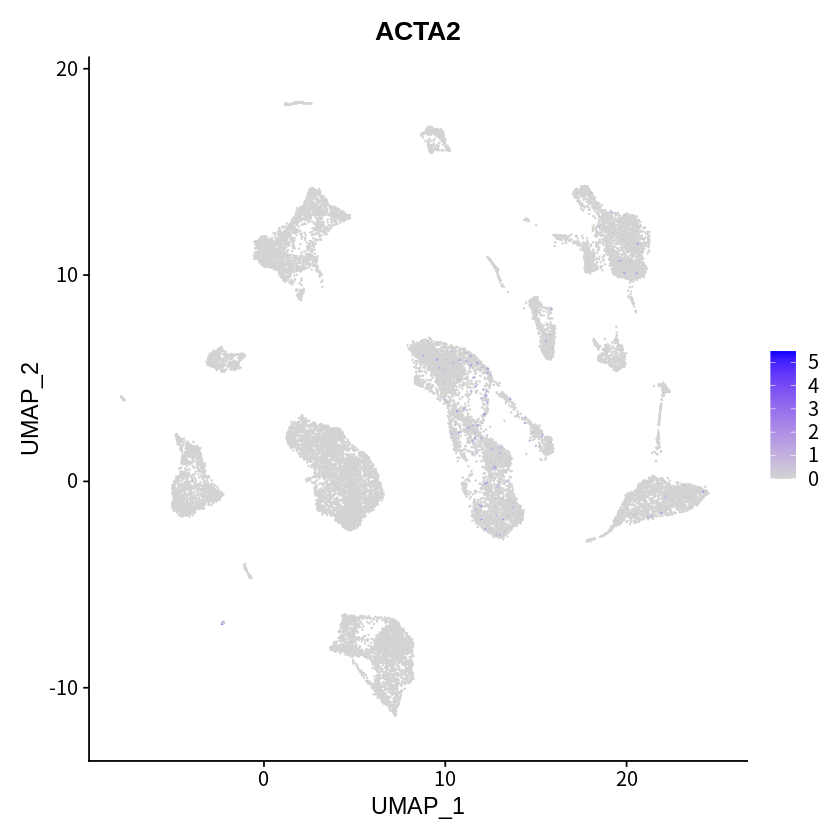

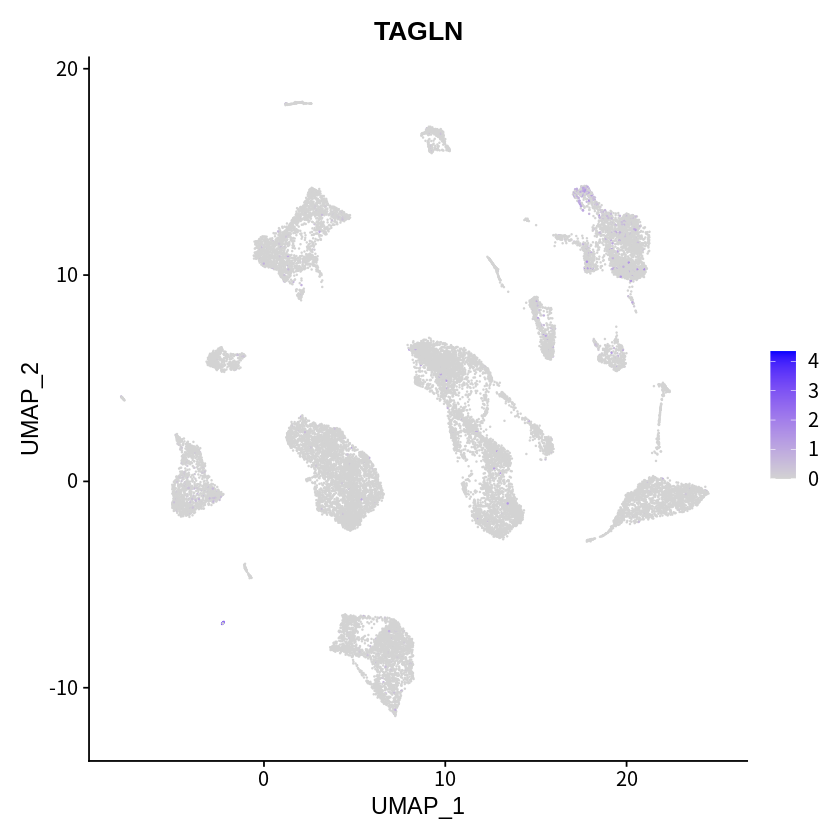

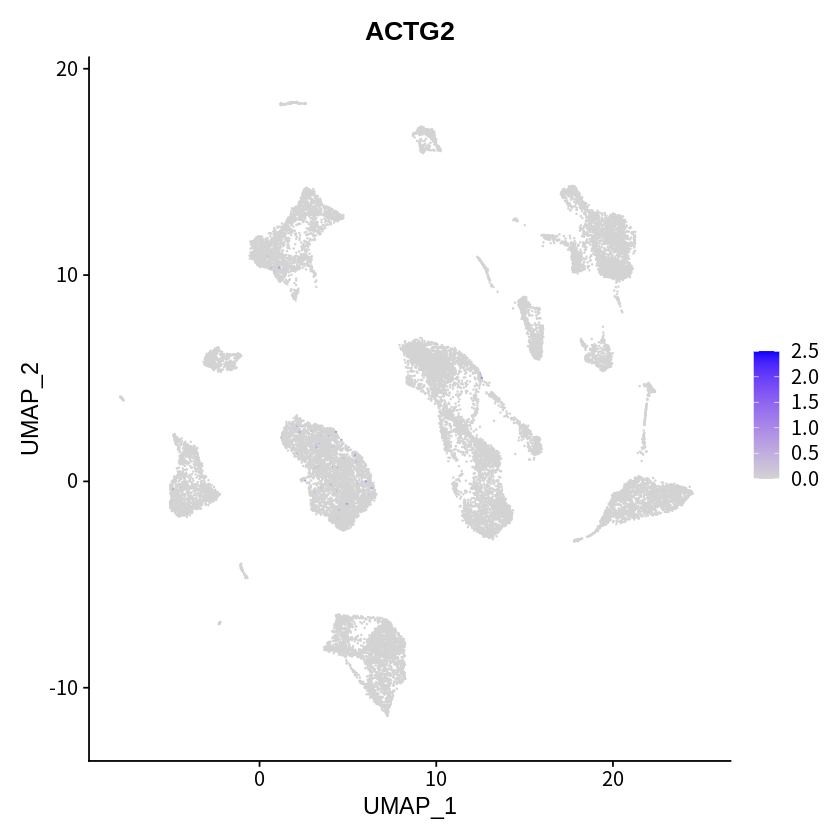

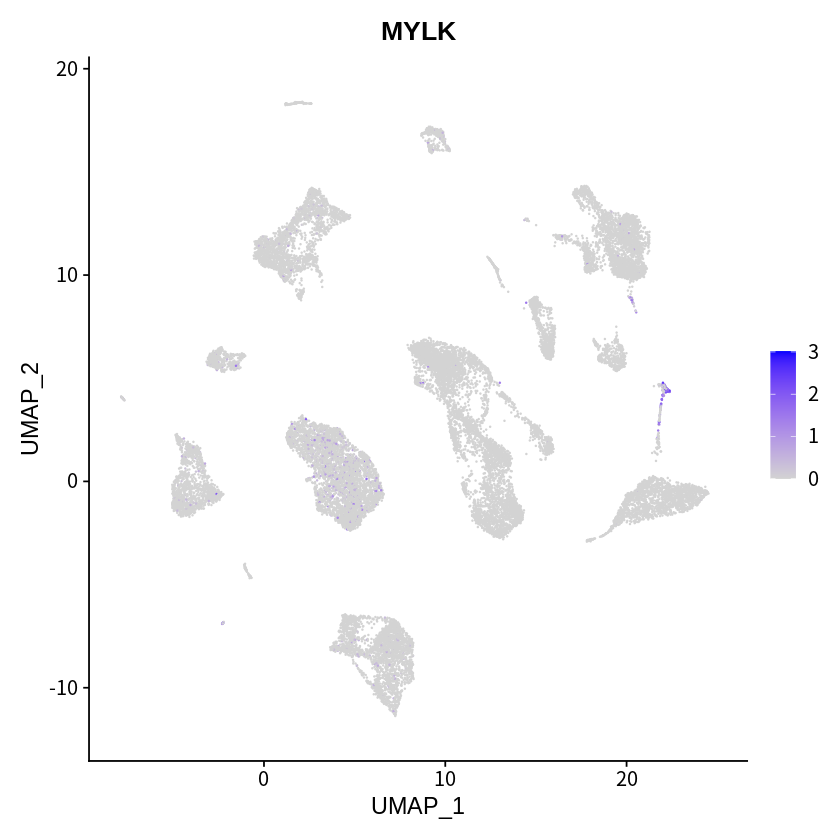

In [62]:
FeaturePlot(SCLC.filter, "MYH11", reduction = "umap")
FeaturePlot(SCLC.filter, "ACTA2", reduction = "umap")
FeaturePlot(SCLC.filter, "TAGLN", reduction = "umap")
FeaturePlot(SCLC.filter, "ACTG2", reduction = "umap")
FeaturePlot(SCLC.filter, "MYLK", reduction = "umap")

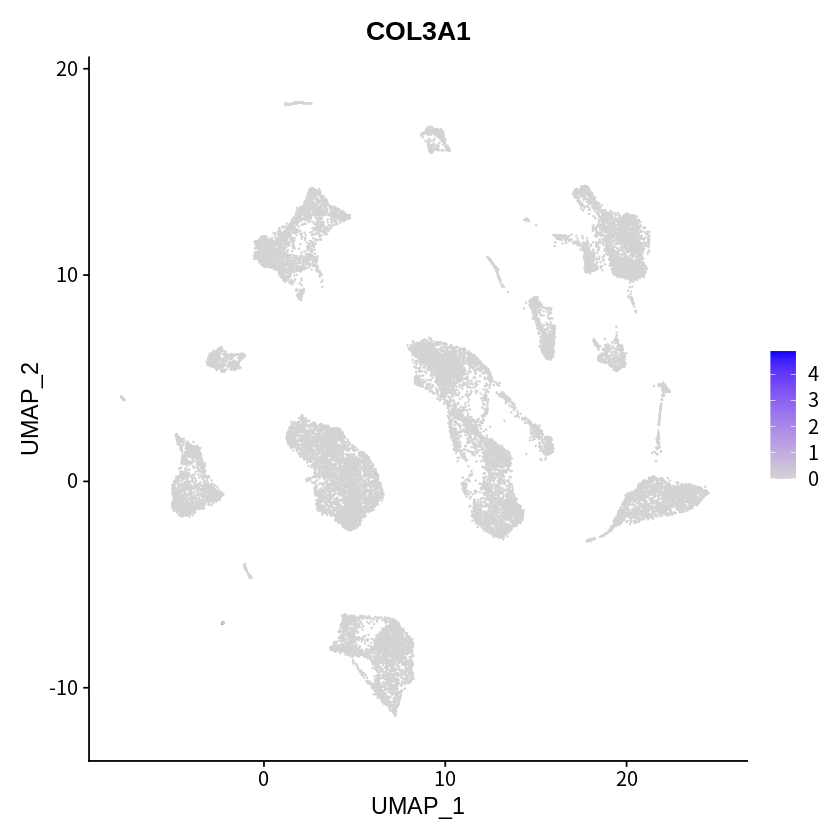

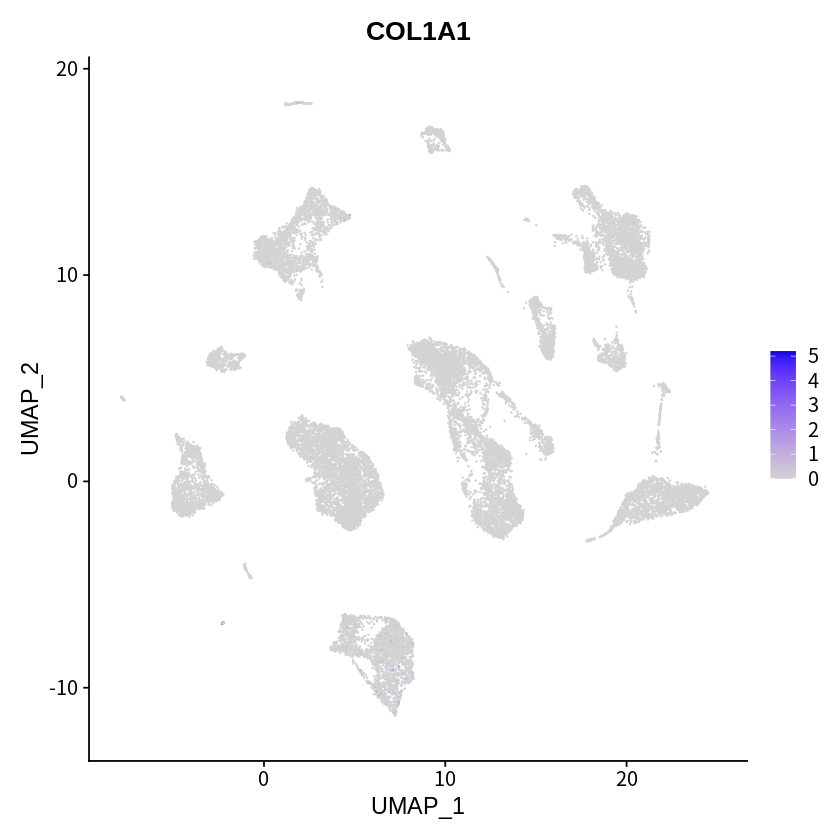

In [63]:
FeaturePlot(SCLC.filter, "COL3A1", reduction = "umap")
FeaturePlot(SCLC.filter, "COL1A1", reduction = "umap")

In [3]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1      stringr_1.4.0      dplyr_1.0.7        purrr_0.3.4       
 [5] readr_2.1.1        tidyr_1.1.4        tibble_3.1.6       ggplot2_3.3.5     
 [9] tidyverse_1.3.1    SeuratObject_4.0.4 Seurat_4.0.6      

loaded via a namespace (and not attached):
  [1] Rtsne_0.15            colors